## Final Project
## 5/3/24
## Prisha Priyadarshini
## I had to analyze a data set from beginning to the end. I applied multiple computational tools to clean, scale, and built predictive classifiers of a diagnostic data set

In [1]:
%pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score , classification_report, roc_curve , auc

Matplotlib is building the font cache; this may take a moment.


In [3]:
data = pd.read_csv("wisconsin.csv")
print(data.head())
print(data.info())
print(data.describe())
print(data.shape)

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

In [4]:
data.drop("id", axis=1, inplace=True)

In [5]:
missing_values = data.isnull().sum().sum()

In [6]:
print(data['diagnosis'].unique())

['M' 'B']


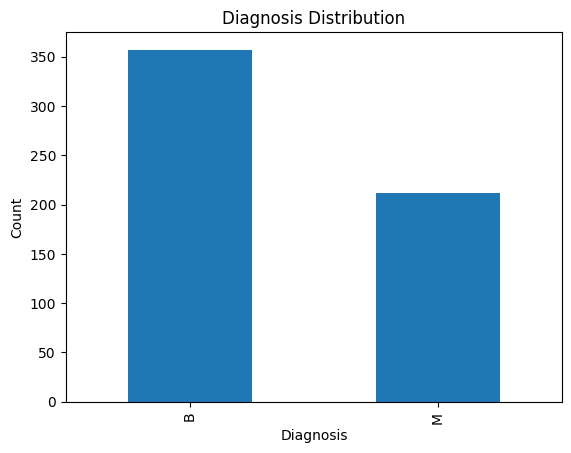

In [7]:
diagnosis_counts = data['diagnosis'].value_counts()
diagnosis_counts.plot(kind='bar')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.title('Diagnosis Distribution')
plt.show()

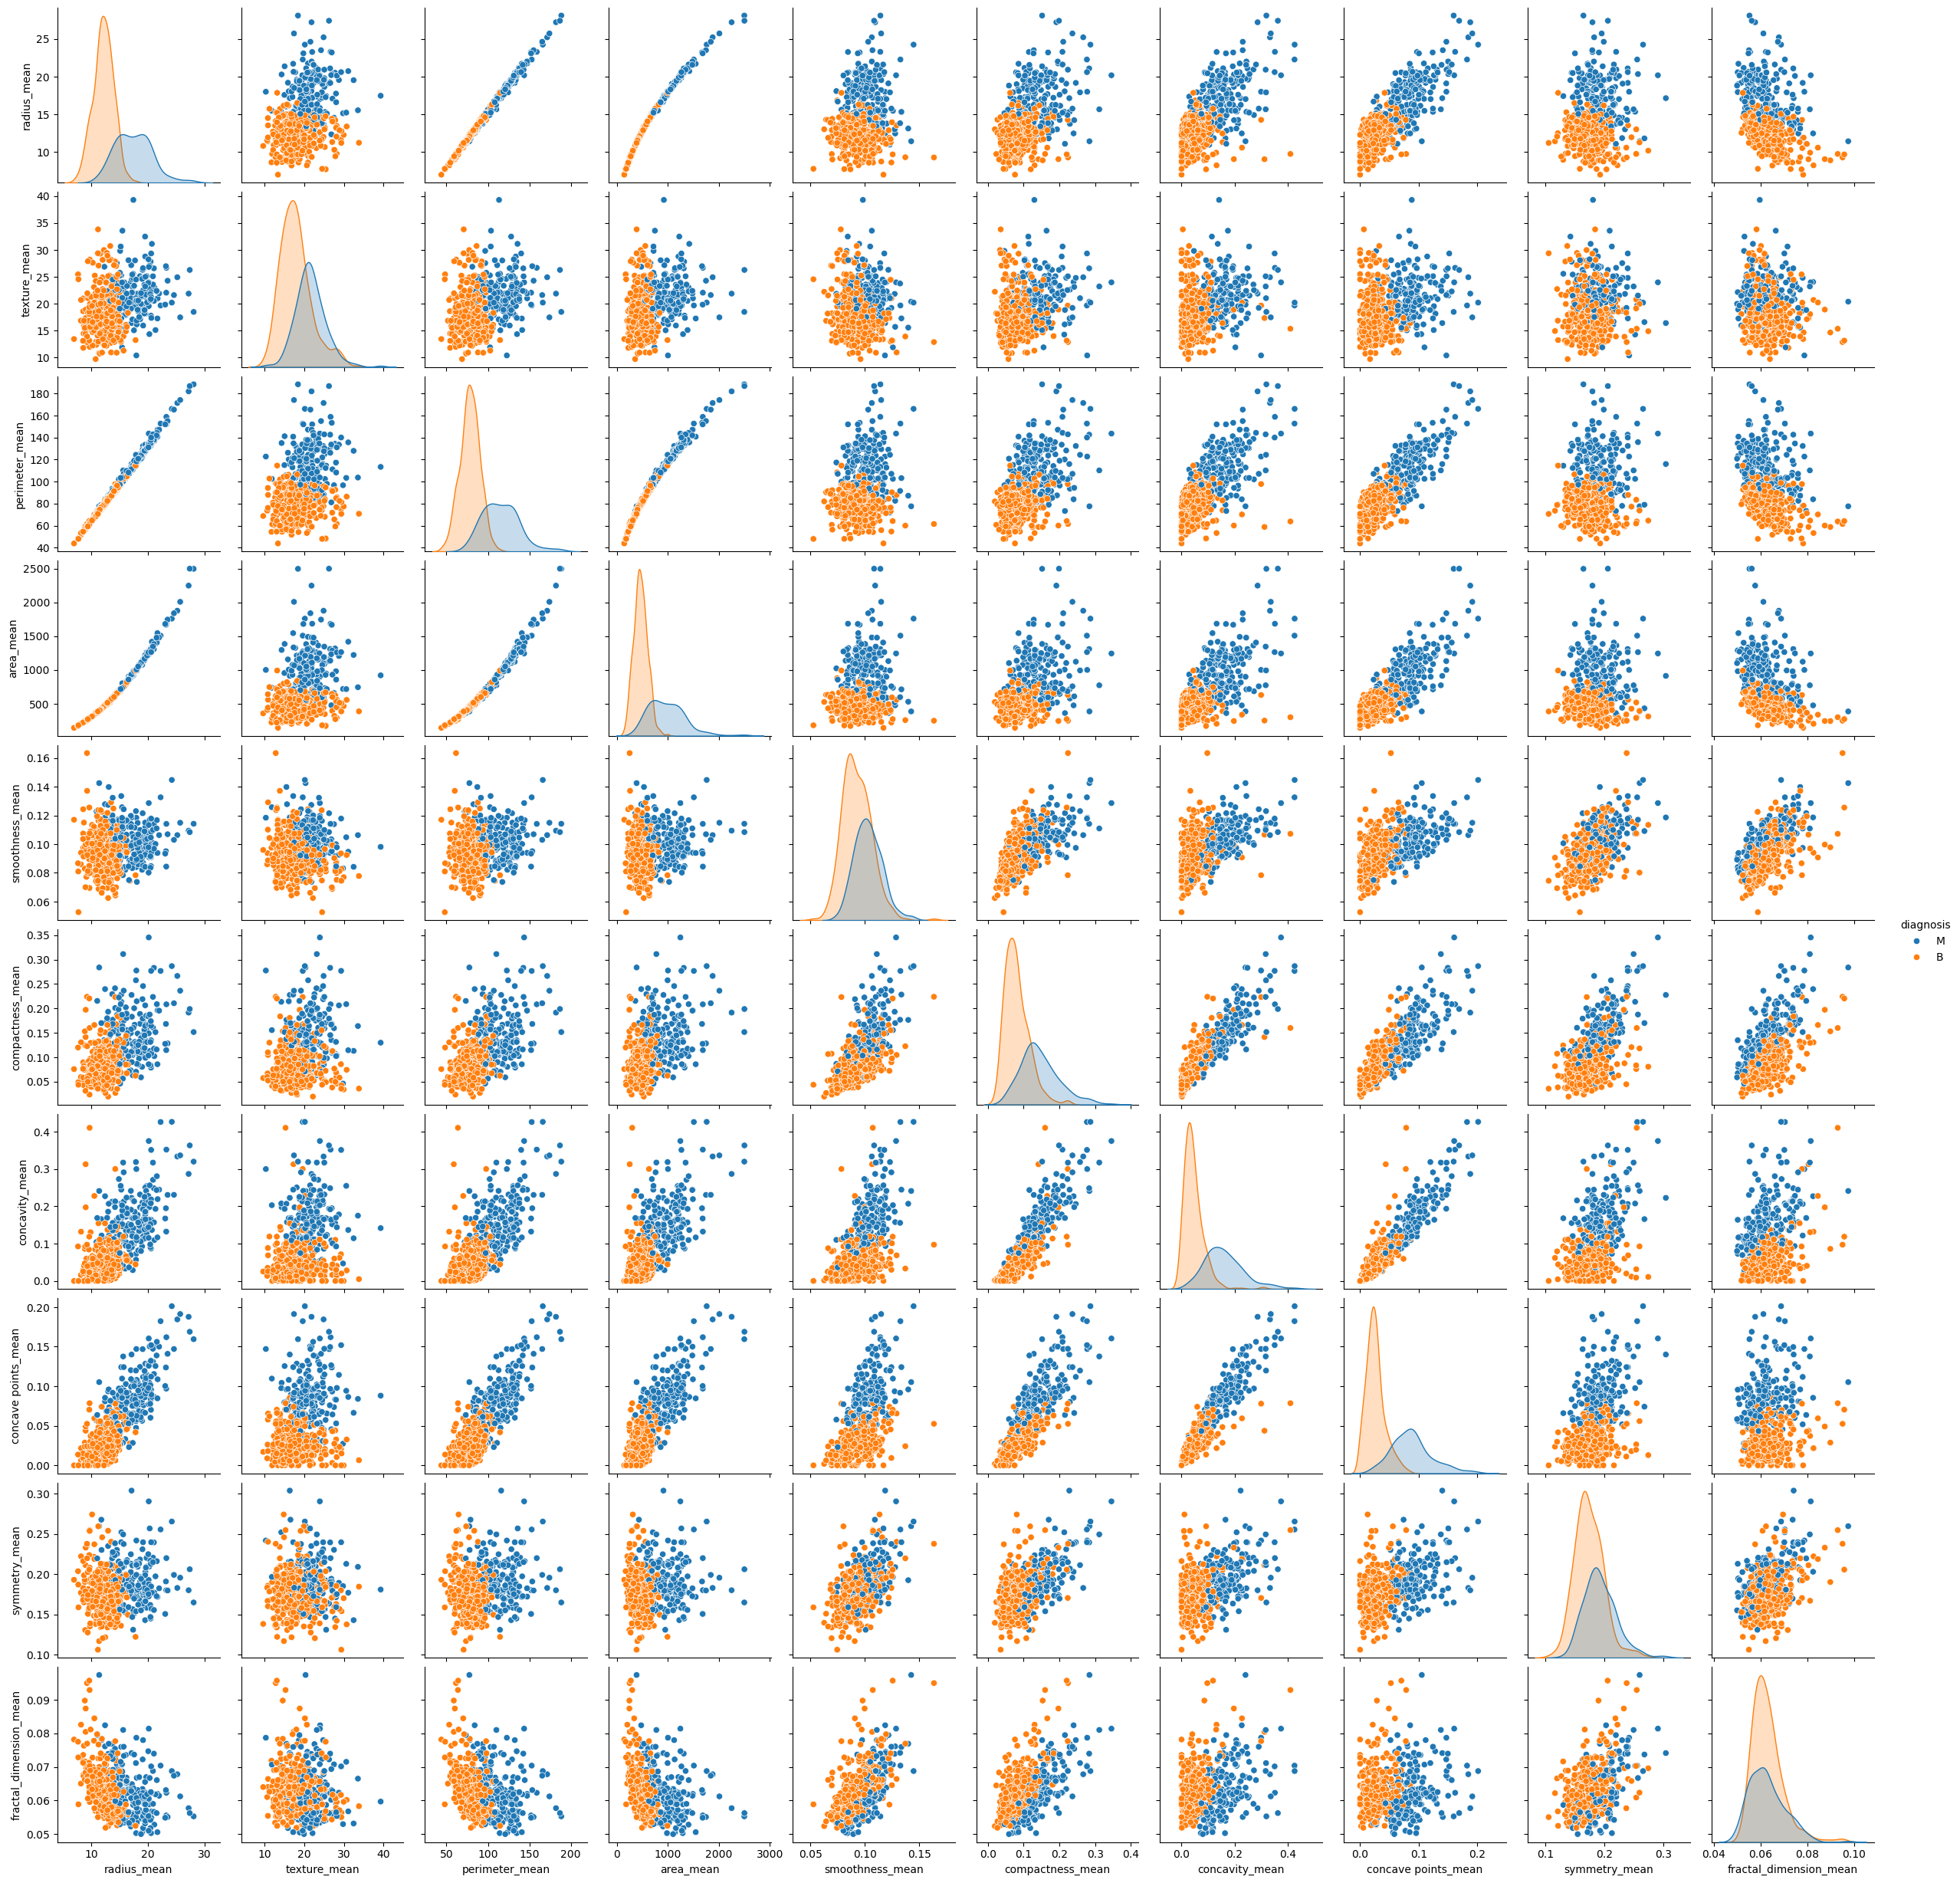

In [8]:
mean_cols = [col for col in data.columns if col.endswith('_mean')]
sns.pairplot(data, vars=mean_cols, hue='diagnosis')
plt.show()

In [9]:
y = data['diagnosis'].copy()
X = data[mean_cols].copy()

In [10]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

Explained Variance Ratio: [5.47858799e-01 2.51871359e-01 8.80615179e-02 4.99009436e-02
 3.72539190e-02 1.24141749e-02 8.00853104e-03 3.48897928e-03
 1.11354606e-03 2.82305888e-05]


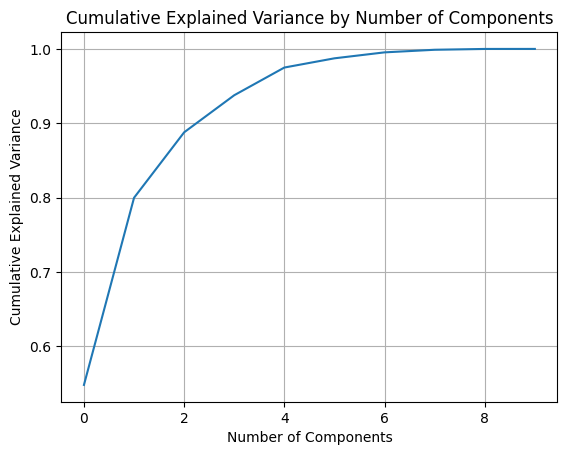

In [13]:
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
plt.plot(cumulative_explained_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Number of Components')
plt.grid()
plt.show()

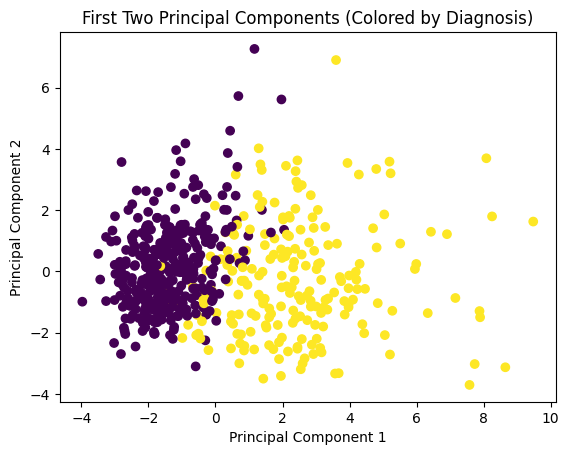

In [14]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('First Two Principal Components (Colored by Diagnosis)')
plt.show()

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [16]:
k_values = range(1, 21)
error_rate = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, Y_train, cv=5)
    error_rate.append(1 - scores.mean())

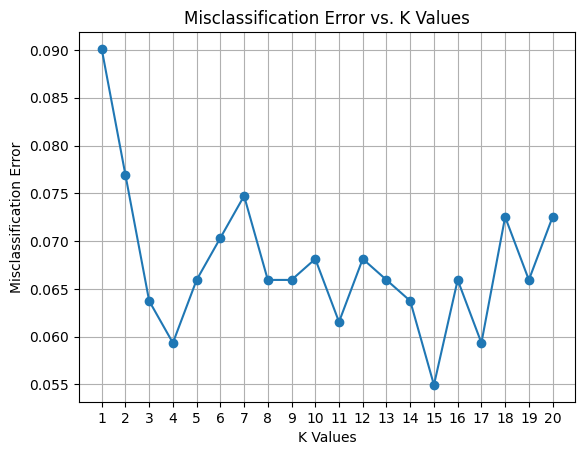

In [17]:
plt.plot(k_values, error_rate, marker='o')
plt.xlabel('K Values')
plt.ylabel('Misclassification Error')
plt.title('Misclassification Error vs. K Values')
plt.xticks(k_values)
plt.grid()
plt.show()


In [18]:
best_k = k_values[np.argmin(error_rate)]
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, Y_train)
Y_pred_knn = knn.predict(X_test)

In [20]:
conf_matrix_knn = confusion_matrix(Y_test, Y_pred_knn)
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
print("Confusion Matrix (K-NN):")
print(conf_matrix_knn)
print("Accuracy (K-NN):", accuracy_knn)


Confusion Matrix (K-NN):
[[70  1]
 [ 4 39]]
Accuracy (K-NN): 0.956140350877193


In [21]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, Y_train)

DecisionTreeClassifier()

In [22]:
Pridected_Y = dt_classifier.predict(X_test)

In [23]:
conf_matrix_dt = confusion_matrix(Y_test, Pridected_Y)
accuracy_dt = accuracy_score(Y_test, Pridected_Y)
print("Confusion Matrix (Decision Tree):")
print(conf_matrix_dt)
print("Accuracy (Decision Tree):", accuracy_dt)

Confusion Matrix (Decision Tree):
[[68  3]
 [ 5 38]]
Accuracy (Decision Tree): 0.9298245614035088


In [24]:
print("Accuracy Comparison:")
print("K-NN Classifier:", accuracy_knn)
print("Decision Tree Classifier:", accuracy_dt)

Accuracy Comparison:
K-NN Classifier: 0.956140350877193
Decision Tree Classifier: 0.9298245614035088


Classification Report (K-NN)
              precision    recall  f1-score   support

      Benign       0.95      0.99      0.97        71
   Malignant       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Classification Report (Decision Tree)
              precision    recall  f1-score   support

      Benign       0.93      0.96      0.94        71
   Malignant       0.93      0.88      0.90        43

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



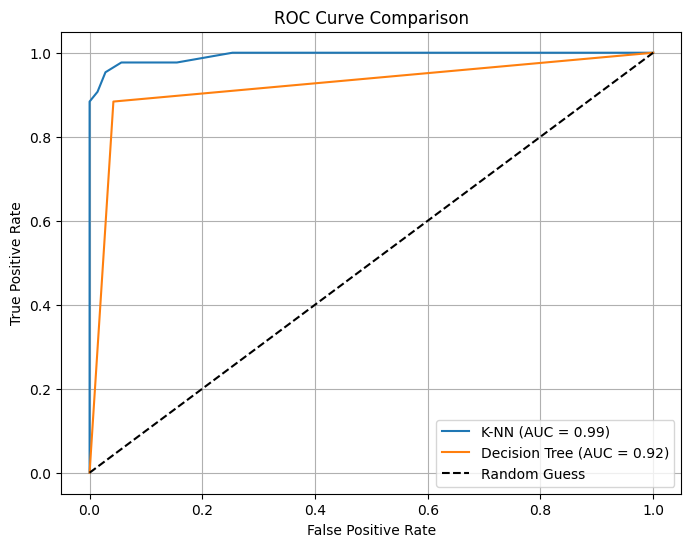

In [25]:
print("Classification Report (K-NN)")
print(classification_report(Y_test , Y_pred_knn , target_names = ['Benign' , 'Malignant']))
print("Classification Report (Decision Tree)")
print(classification_report(Y_test, Pridected_Y , target_names=['Benign' , 'Malignant']))
knn_probs = knn.predict_proba(X_test)[:, 1]
dt_probs = dt_classifier.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(Y_test, knn_probs)
fpr_dt, tpr_dt, _ = roc_curve(Y_test, dt_probs)

auc_knn = auc(fpr_knn, tpr_knn)
auc_dt = auc(fpr_dt, tpr_dt)

plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, label=f'K-NN (AUC = {auc_knn:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [28]:
## Reflection:
## Both the K-NN and Decision Tree classifiers performed well, with K-NN slightly outperforming in accuracy. However, after evaluating precision, recall, and F1-score using the classification report, K-NN also demonstrated better balance in correctly identifying malignant cases with fewer false negatives—critical in a medical setting. The ROC curve comparison further validated this, showing a higher AUC for K-NN. These robustness metrics show that K-NN not only performs better on average but is also more reliable in sensitive healthcare diagnostics.